## [Face Keypoints Data Sit](https://www.kaggle.com/c/facial-keypoints-detection/data)

### Data Preprocessing

In [1]:
%matplotlib inline
import os
import sys
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

TRAIN_DATA_PATH = 'E:\\dataSets\\face-keypoints\\face-keypoints\\data\\train\\training.csv'
TEST_DATA_PATH = 'E:\\dataSets\\face-keypoints\\face-keypoints\\data\\test\\test.csv '
LOOKUP_TABLE = 'E:\\dataSets\\face-keypoints\\face-keypoints\\data\\IdLookupTable.csv'

In [2]:
def load(test=False, cols=None):
    """Loads data from FTEST if *test* is True, otherwise from FTRAIN.
    Pass a list of *cols* if you're only interested in a subset of the
    target columns.
    """
    fname = TEST_DATA_PATH if test else TRAIN_DATA_PATH
    df = pd.read_csv(fname)
    
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))
    
    if cols:
        df = df[list(cols) + ['Image']]
        
    print(df.count())
    df = df.dropna() 
    
    X = np.vstack(df['Image'].values) / 255. 
    X = X.astype(np.float32) 
    
    if not test:
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48
        X, y = shuffle(X, y, random_state=42) 
        y = y.astype(np.float32)
    else:
        y = None
        
    return X, y

def load2d(test=False, cols=None):
    X, y = load(test=test, cols=cols)
    X = X.reshape(-1, 96, 96, 1) # 轉換成Conv2D的卷積層的input shape
    
    return X, y

## Method 1

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(9216,)))
model.add(Dense(30)) 

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               921700    
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3030      
Total params: 924,730
Trainable params: 924,730
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Training
X, y = load()

print('X.shape == {}; X.min == {:.3f}; X.max == {:.3f}'.format(X.shape, X.min(), X.max()))
print('y.shape == {}; y.min == {:.3f}; y.max == {:.3f}'.format(y.shape, y.min(), y.max()))

batch_size = 32
epochs = 100

history = model.fit(X, y,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)


left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

X.shape == (2140, 9216); X.min == 0.000; X.max == 1.000
y.shape == (2140, 30); y.min == -0.920; y.max == 0.996


Train on 1712 samples, validate on 428 samples
Epoch 1/100


  32/1712 [..............................] - ETA: 9:38 - loss: 0.3556

 288/1712 [====>.........................] - ETA: 54s - loss: 0.1299 

 704/1712 [===========>..................] - ETA: 15s - loss: 0.0777

1088/1712 [==================>...........] - ETA: 6s - loss: 0.0563 

1472/1712 [========================>.....] - ETA: 1s - loss: 0.0455

1712/1712 [==============================] - 11s 7ms/step - loss: 0.0412 - val_loss: 0.0134


Epoch 2/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0131

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0131

 864/1712 [==============>...............] - ETA: 0s - loss: 0.0128

1408/1712 [=======================>......] - ETA: 0s - loss: 0.0126

1712/1712 [==============================] - 0s 123us/step - loss: 0.0126 - val_loss: 0.0115


Epoch 3/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0128



 576/1712 [=========>....................] - ETA: 0s - loss: 0.0109

1056/1712 [=================>............] - ETA: 0s - loss: 0.0110

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0109

1712/1712 [==============================] - 0s 112us/step - loss: 0.0108 - val_loss: 0.0117


Epoch 4/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0106

 448/1712 [======>.......................] - ETA: 0s - loss: 0.0099

 864/1712 [==============>...............] - ETA: 0s - loss: 0.0101

1312/1712 [=====================>........] - ETA: 0s - loss: 0.0102

1712/1712 [==============================] - 0s 140us/step - loss: 0.0100 - val_loss: 0.0098


Epoch 5/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0082

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0092

 960/1712 [===============>..............] - ETA: 0s - loss: 0.0091

1376/1712 [=======================>......] - ETA: 0s - loss: 0.0091

1712/1712 [==============================] - 0s 136us/step - loss: 0.0091 - val_loss: 0.0092


Epoch 6/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0061

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0083

 832/1712 [=============>................] - ETA: 0s - loss: 0.0089

1280/1712 [=====================>........] - ETA: 0s - loss: 0.0088

1712/1712 [==============================] - 0s 143us/step - loss: 0.0088 - val_loss: 0.0086


Epoch 7/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0065

 448/1712 [======>.......................] - ETA: 0s - loss: 0.0083

 896/1712 [==============>...............] - ETA: 0s - loss: 0.0081

1312/1712 [=====================>........] - ETA: 0s - loss: 0.0082

1712/1712 [==============================] - 0s 143us/step - loss: 0.0082 - val_loss: 0.0087


Epoch 8/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0098

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0081

 800/1712 [=============>................] - ETA: 0s - loss: 0.0081

1216/1712 [====================>.........] - ETA: 0s - loss: 0.0080

1664/1712 [============================>.] - ETA: 0s - loss: 0.0078

1712/1712 [==============================] - 0s 148us/step - loss: 0.0078 - val_loss: 0.0108


Epoch 9/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0103

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0091

 864/1712 [==============>...............] - ETA: 0s - loss: 0.0083

1280/1712 [=====================>........] - ETA: 0s - loss: 0.0080



1664/1712 [============================>.] - ETA: 0s - loss: 0.0077

1712/1712 [==============================] - 0s 146us/step - loss: 0.0076 - val_loss: 0.0079


Epoch 10/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0075

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0070

 928/1712 [===============>..............] - ETA: 0s - loss: 0.0072



1440/1712 [========================>.....] - ETA: 0s - loss: 0.0072

1712/1712 [==============================] - 0s 125us/step - loss: 0.0072 - val_loss: 0.0076


Epoch 11/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0074

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0069

1120/1712 [==================>...........] - ETA: 0s - loss: 0.0069

1696/1712 [============================>.] - ETA: 0s - loss: 0.0070

1712/1712 [==============================] - 0s 106us/step - loss: 0.0070 - val_loss: 0.0076


Epoch 12/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0062

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0070

1056/1712 [=================>............] - ETA: 0s - loss: 0.0068

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0068



1712/1712 [==============================] - 0s 111us/step - loss: 0.0068 - val_loss: 0.0086


Epoch 13/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0086

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0068

 960/1712 [===============>..............] - ETA: 0s - loss: 0.0065

1440/1712 [========================>.....] - ETA: 0s - loss: 0.0065

1712/1712 [==============================] - 0s 124us/step - loss: 0.0066 - val_loss: 0.0072


Epoch 14/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0063

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0064

 864/1712 [==============>...............] - ETA: 0s - loss: 0.0066

1376/1712 [=======================>......] - ETA: 0s - loss: 0.0065

1712/1712 [==============================] - 0s 135us/step - loss: 0.0064 - val_loss: 0.0070


Epoch 15/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0059

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0065

 832/1712 [=============>................] - ETA: 0s - loss: 0.0062

1184/1712 [===================>..........] - ETA: 0s - loss: 0.0062

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0062

1712/1712 [==============================] - 0s 152us/step - loss: 0.0063 - val_loss: 0.0068


Epoch 16/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0065

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0060



 864/1712 [==============>...............] - ETA: 0s - loss: 0.0061

1280/1712 [=====================>........] - ETA: 0s - loss: 0.0062

1696/1712 [============================>.] - ETA: 0s - loss: 0.0061

1712/1712 [==============================] - 0s 145us/step - loss: 0.0061 - val_loss: 0.0070


Epoch 17/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0049

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0056

 992/1712 [================>.............] - ETA: 0s - loss: 0.0059

1440/1712 [========================>.....] - ETA: 0s - loss: 0.0060



1712/1712 [==============================] - 0s 125us/step - loss: 0.0060 - val_loss: 0.0068


Epoch 18/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0077

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0058

1120/1712 [==================>...........] - ETA: 0s - loss: 0.0058

1696/1712 [============================>.] - ETA: 0s - loss: 0.0058

1712/1712 [==============================] - 0s 110us/step - loss: 0.0058 - val_loss: 0.0065


Epoch 19/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0050

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0056

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0057

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0058

1712/1712 [==============================] - 0s 117us/step - loss: 0.0057 - val_loss: 0.0078


Epoch 20/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0052



 544/1712 [========>.....................] - ETA: 0s - loss: 0.0056



1056/1712 [=================>............] - ETA: 0s - loss: 0.0055

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0056



1712/1712 [==============================] - 0s 117us/step - loss: 0.0055 - val_loss: 0.0065


Epoch 21/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0058



 544/1712 [========>.....................] - ETA: 0s - loss: 0.0054

1024/1712 [================>.............] - ETA: 0s - loss: 0.0053

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0054

1712/1712 [==============================] - 0s 115us/step - loss: 0.0054 - val_loss: 0.0061


Epoch 22/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0046

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0053

1024/1712 [================>.............] - ETA: 0s - loss: 0.0053

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0053

1712/1712 [==============================] - 0s 115us/step - loss: 0.0053 - val_loss: 0.0064


Epoch 23/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0069

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0058

1056/1712 [=================>............] - ETA: 0s - loss: 0.0055

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0053

1712/1712 [==============================] - 0s 115us/step - loss: 0.0053 - val_loss: 0.0064


Epoch 24/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0041



 480/1712 [=======>......................] - ETA: 0s - loss: 0.0051

1024/1712 [================>.............] - ETA: 0s - loss: 0.0053

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0053



1712/1712 [==============================] - 0s 120us/step - loss: 0.0053 - val_loss: 0.0058


Epoch 25/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0045



 512/1712 [=======>......................] - ETA: 0s - loss: 0.0051

1024/1712 [================>.............] - ETA: 0s - loss: 0.0051

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0051

1712/1712 [==============================] - 0s 115us/step - loss: 0.0051 - val_loss: 0.0056


Epoch 26/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0042

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0048

1024/1712 [================>.............] - ETA: 0s - loss: 0.0049

1472/1712 [========================>.....] - ETA: 0s - loss: 0.0049

1712/1712 [==============================] - 0s 121us/step - loss: 0.0049 - val_loss: 0.0060


Epoch 27/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0051

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0049

1024/1712 [================>.............] - ETA: 0s - loss: 0.0049

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0049



1712/1712 [==============================] - 0s 120us/step - loss: 0.0049 - val_loss: 0.0063


Epoch 28/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0055

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0045

 832/1712 [=============>................] - ETA: 0s - loss: 0.0048

1312/1712 [=====================>........] - ETA: 0s - loss: 0.0049

1712/1712 [==============================] - 0s 128us/step - loss: 0.0049 - val_loss: 0.0056


Epoch 29/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0057

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0048

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0047

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0047

1712/1712 [==============================] - 0s 109us/step - loss: 0.0047 - val_loss: 0.0054


Epoch 30/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0046

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0043

1056/1712 [=================>............] - ETA: 0s - loss: 0.0046

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0046

1712/1712 [==============================] - 0s 110us/step - loss: 0.0046 - val_loss: 0.0053


Epoch 31/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0039

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0046

1056/1712 [=================>............] - ETA: 0s - loss: 0.0046

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0046

1712/1712 [==============================] - 0s 110us/step - loss: 0.0046 - val_loss: 0.0056


Epoch 32/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0047

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0043

 992/1712 [================>.............] - ETA: 0s - loss: 0.0045

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0045

1712/1712 [==============================] - 0s 115us/step - loss: 0.0045 - val_loss: 0.0053


Epoch 33/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0058

 576/1712 [=========>....................] - ETA: 0s - loss: 0.0043

1120/1712 [==================>...........] - ETA: 0s - loss: 0.0043

1696/1712 [============================>.] - ETA: 0s - loss: 0.0044

1712/1712 [==============================] - 0s 107us/step - loss: 0.0044 - val_loss: 0.0052


Epoch 34/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0036

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0043

1056/1712 [=================>............] - ETA: 0s - loss: 0.0045

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0044

1712/1712 [==============================] - 0s 111us/step - loss: 0.0044 - val_loss: 0.0051


Epoch 35/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0057

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0042

1056/1712 [=================>............] - ETA: 0s - loss: 0.0043

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0044

1712/1712 [==============================] - 0s 112us/step - loss: 0.0044 - val_loss: 0.0056


Epoch 36/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0047

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0047

1056/1712 [=================>............] - ETA: 0s - loss: 0.0044

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0043

1712/1712 [==============================] - 0s 115us/step - loss: 0.0043 - val_loss: 0.0050


Epoch 37/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0037

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0040

 992/1712 [================>.............] - ETA: 0s - loss: 0.0040



1568/1712 [==========================>...] - ETA: 0s - loss: 0.0042

1712/1712 [==============================] - 0s 118us/step - loss: 0.0042 - val_loss: 0.0050


Epoch 38/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0033

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0040

1024/1712 [================>.............] - ETA: 0s - loss: 0.0041

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0041

1712/1712 [==============================] - 0s 121us/step - loss: 0.0041 - val_loss: 0.0051


Epoch 39/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0040

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0039



1024/1712 [================>.............] - ETA: 0s - loss: 0.0041



1536/1712 [=========================>....] - ETA: 0s - loss: 0.0041

1712/1712 [==============================] - 0s 124us/step - loss: 0.0041 - val_loss: 0.0053


Epoch 40/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0034

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0039

 992/1712 [================>.............] - ETA: 0s - loss: 0.0039

1472/1712 [========================>.....] - ETA: 0s - loss: 0.0040

1712/1712 [==============================] - 0s 123us/step - loss: 0.0040 - val_loss: 0.0053


Epoch 41/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0043

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0039

 896/1712 [==============>...............] - ETA: 0s - loss: 0.0039

1408/1712 [=======================>......] - ETA: 0s - loss: 0.0039

1712/1712 [==============================] - 0s 123us/step - loss: 0.0040 - val_loss: 0.0048


Epoch 42/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0044

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0042

 960/1712 [===============>..............] - ETA: 0s - loss: 0.0041

1504/1712 [=========================>....] - ETA: 0s - loss: 0.0040

1712/1712 [==============================] - 0s 120us/step - loss: 0.0040 - val_loss: 0.0048


Epoch 43/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0029

 576/1712 [=========>....................] - ETA: 0s - loss: 0.0037



1088/1712 [==================>...........] - ETA: 0s - loss: 0.0037

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0038

1712/1712 [==============================] - 0s 126us/step - loss: 0.0039 - val_loss: 0.0047


Epoch 44/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0043

 416/1712 [======>.......................] - ETA: 0s - loss: 0.0039

 928/1712 [===============>..............] - ETA: 0s - loss: 0.0039

1440/1712 [========================>.....] - ETA: 0s - loss: 0.0038

1712/1712 [==============================] - 0s 128us/step - loss: 0.0038 - val_loss: 0.0046


Epoch 45/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0042

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0038



1056/1712 [=================>............] - ETA: 0s - loss: 0.0039

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0038

1712/1712 [==============================] - 0s 112us/step - loss: 0.0038 - val_loss: 0.0046


Epoch 46/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0033

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0037

1056/1712 [=================>............] - ETA: 0s - loss: 0.0037

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0038

1712/1712 [==============================] - 0s 111us/step - loss: 0.0038 - val_loss: 0.0049


Epoch 47/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0039

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0039

 928/1712 [===============>..............] - ETA: 0s - loss: 0.0038

1376/1712 [=======================>......] - ETA: 0s - loss: 0.0037

1712/1712 [==============================] - 0s 125us/step - loss: 0.0038 - val_loss: 0.0048


Epoch 48/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0040



 544/1712 [========>.....................] - ETA: 0s - loss: 0.0036

1056/1712 [=================>............] - ETA: 0s - loss: 0.0036

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0036



1712/1712 [==============================] - 0s 117us/step - loss: 0.0037 - val_loss: 0.0047


Epoch 49/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0035

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0037

1056/1712 [=================>............] - ETA: 0s - loss: 0.0038

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0037

1712/1712 [==============================] - 0s 119us/step - loss: 0.0037 - val_loss: 0.0060


Epoch 50/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0049



 544/1712 [========>.....................] - ETA: 0s - loss: 0.0036



1024/1712 [================>.............] - ETA: 0s - loss: 0.0038



1536/1712 [=========================>....] - ETA: 0s - loss: 0.0037

1712/1712 [==============================] - 0s 117us/step - loss: 0.0036 - val_loss: 0.0049


Epoch 51/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0039

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0036

1024/1712 [================>.............] - ETA: 0s - loss: 0.0035



1568/1712 [==========================>...] - ETA: 0s - loss: 0.0035

1712/1712 [==============================] - 0s 115us/step - loss: 0.0036 - val_loss: 0.0046


Epoch 52/100

  32/1712 [..............................] - ETA: 0s - loss: 0.0033

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0036

1024/1712 [================>.............] - ETA: 0s - loss: 0.0035

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0036

1712/1712 [==============================] - 0s 115us/step - loss: 0.0035 - val_loss: 0.0043


Epoch 53/100


  32/1712 [..............................]

 - ETA: 0s - loss: 0.0033

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0034

1056/1712 [=================>............] - ETA: 0s - loss: 0.0035



1600/1712 [===========================>..] - ETA: 0s - loss: 0.0035

1712/1712 [==============================] - 0s 115us/step - loss: 0.0035 - val_loss: 0.0043


Epoch 54/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0030

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0036

1024/1712 [================>.............] - ETA: 0s - loss: 0.0035

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0034

1712/1712 [==============================] - 0s 115us/step - loss: 0.0034 - val_loss: 0.0043


Epoch 55/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0030

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0038

1024/1712 [================>.............] - ETA: 0s - loss: 0.0036

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0035

1712/1712 [==============================] - 0s 114us/step - loss: 0.0035 - val_loss: 0.0044


Epoch 56/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0029

 448/1712 [======>.......................] - ETA: 0s - loss: 0.0033

 896/1712 [==============>...............] - ETA: 0s - loss: 0.0033

1440/1712 [========================>.....] - ETA: 0s - loss: 0.0033

1712/1712 [==============================] - 0s 125us/step - loss: 0.0033 - val_loss: 0.0042


Epoch 57/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0027

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0033

1024/1712 [================>.............] - ETA: 0s - loss: 0.0033

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0033



1712/1712 [==============================] - 0s 118us/step - loss: 0.0033 - val_loss: 0.0044


Epoch 58/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0031

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0033

1024/1712 [================>.............] - ETA: 0s - loss: 0.0033

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0033



1712/1712 [==============================] - 0s 117us/step - loss: 0.0033 - val_loss: 0.0044


Epoch 59/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0028

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0032

 992/1712 [================>.............]

 - ETA: 0s - loss: 0.0032

1504/1712 [=========================>....] - ETA: 0s - loss: 0.0033

1712/1712 [==============================] - 0s 117us/step - loss: 0.0033 - val_loss: 0.0043


Epoch 60/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0031

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0031

1024/1712 [================>.............] - ETA: 0s - loss: 0.0032

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0033

1712/1712 [==============================] - 0s 116us/step - loss: 0.0033 - val_loss: 0.0043


Epoch 61/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0029



 480/1712 [=======>......................] - ETA: 0s - loss: 0.0031

 960/1712 [===============>..............] - ETA: 0s - loss: 0.0031



1440/1712 [========================>.....] - ETA: 0s - loss: 0.0032

1712/1712 [==============================] - 0s 122us/step - loss: 0.0032 - val_loss: 0.0042


Epoch 62/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0043



 576/1712 [=========>....................] - ETA: 0s - loss: 0.0033



1088/1712 [==================>...........] - ETA: 0s - loss: 0.0032

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0032

1712/1712 [==============================] - 0s 113us/step - loss: 0.0032 - val_loss: 0.0042


Epoch 63/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0035

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0031

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0031

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0032

1712/1712 [==============================] - 0s 112us/step - loss: 0.0032 - val_loss: 0.0044


Epoch 64/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0031

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0031

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0031

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0031

1712/1712 [==============================] - 0s 115us/step - loss: 0.0031 - val_loss: 0.0044


Epoch 65/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0037

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0030

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0031



1664/1712 [============================>.] - ETA: 0s - loss: 0.0031

1712/1712 [==============================] - 0s 115us/step - loss: 0.0031 - val_loss: 0.0040


Epoch 66/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0029

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0032

1024/1712 [================>.............] - ETA: 0s - loss: 0.0031

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0031

1712/1712 [==============================] - 0s 113us/step - loss: 0.0031 - val_loss: 0.0041


Epoch 67/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0029

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0030

1056/1712 [=================>............] - ETA: 0s - loss: 0.0030

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0030

1712/1712 [==============================] - 0s 114us/step - loss: 0.0031 - val_loss: 0.0043


Epoch 68/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0027

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0031

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0031

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0031

1712/1712 [==============================] - 0s 113us/step - loss: 0.0031 - val_loss: 0.0040


Epoch 69/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0031

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0030

1024/1712 [================>.............] - ETA: 0s - loss: 0.0030

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0030

1712/1712 [==============================] - 0s 115us/step - loss: 0.0030 - val_loss: 0.0040


Epoch 70/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0033



 544/1712 [========>.....................] - ETA: 0s - loss: 0.0030



1056/1712 [=================>............] - ETA: 0s - loss: 0.0030

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0030



1712/1712 [==============================] - 0s 117us/step - loss: 0.0030 - val_loss: 0.0039


Epoch 71/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0035



 512/1712 [=======>......................] - ETA: 0s - loss: 0.0033

 960/1712 [===============>..............] - ETA: 0s - loss: 0.0031



1504/1712 [=========================>....] - ETA: 0s - loss: 0.0030

1712/1712 [==============================] - 0s 124us/step - loss: 0.0030 - val_loss: 0.0039


Epoch 72/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0029

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0027



1056/1712 [=================>............] - ETA: 0s - loss: 0.0028

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0029

1712/1712 [==============================] - 0s 114us/step - loss: 0.0029 - val_loss: 0.0039


Epoch 73/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0022

 576/1712 [=========>....................] - ETA: 0s - loss: 0.0027

1120/1712 [==================>...........] - ETA: 0s - loss: 0.0029

1664/1712 [============================>.] - ETA: 0s - loss: 0.0029

1712/1712 [==============================] - 0s 110us/step - loss: 0.0029 - val_loss: 0.0038


Epoch 74/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0023

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0029

1056/1712 [=================>............] - ETA: 0s - loss: 0.0029

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0029

1712/1712 [==============================] - 0s 112us/step - loss: 0.0029 - val_loss: 0.0045


Epoch 75/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0033

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0028

1056/1712 [=================>............] - ETA: 0s - loss: 0.0028

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0028

1712/1712 [==============================] - 0s 111us/step - loss: 0.0029 - val_loss: 0.0039


Epoch 76/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0027

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0027

1024/1712 [================>.............] - ETA: 0s - loss: 0.0028

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0029



1712/1712 [==============================] - 0s 117us/step - loss: 0.0029 - val_loss: 0.0038


Epoch 77/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0030

 480/1712 [=======>......................] - ETA: 0s - loss: 0.0028



 992/1712 [================>.............] - ETA: 0s - loss: 0.0028

1504/1712 [=========================>....] - ETA: 0s - loss: 0.0028

1712/1712 [==============================] - 0s 119us/step - loss: 0.0028 - val_loss: 0.0039


Epoch 78/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0031

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0029

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0029

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0029

1712/1712 [==============================] - 0s 111us/step - loss: 0.0029 - val_loss: 0.0038


Epoch 79/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0025

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0028

 896/1712 [==============>...............] - ETA: 0s - loss: 0.0028

1280/1712 [=====================>........] - ETA: 0s - loss: 0.0029

1712/1712 [==============================] - 0s 135us/step - loss: 0.0028 - val_loss: 0.0040


Epoch 80/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0021

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0027

1056/1712 [=================>............] - ETA: 0s - loss: 0.0027

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0028

1712/1712 [==============================] - 0s 112us/step - loss: 0.0028 - val_loss: 0.0038


Epoch 81/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0032

 448/1712 [======>.......................] - ETA: 0s - loss: 0.0028

 992/1712 [================>.............] - ETA: 0s - loss: 0.0027

1504/1712 [=========================>....] - ETA: 0s - loss: 0.0027



1712/1712 [==============================] - 0s 123us/step - loss: 0.0028 - val_loss: 0.0037


Epoch 82/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0023

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0027

1024/1712 [================>.............] - ETA: 0s - loss: 0.0027

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0027



1712/1712 [==============================] - 0s 119us/step - loss: 0.0027 - val_loss: 0.0037


Epoch 83/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0023

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0029



1024/1712 [================>.............] - ETA: 0s - loss: 0.0028



1536/1712 [=========================>....] - ETA: 0s - loss: 0.0027



1712/1712 [==============================] - 0s 120us/step - loss: 0.0027 - val_loss: 0.0040


Epoch 84/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0031

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0027

 992/1712 [================>.............] - ETA: 0s - loss: 0.0027



1408/1712 [=======================>......] - ETA: 0s - loss: 0.0027

1712/1712 [==============================] - 0s 127us/step - loss: 0.0027 - val_loss: 0.0036


Epoch 85/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0032

 576/1712 [=========>....................] - ETA: 0s - loss: 0.0030

1120/1712 [==================>...........] - ETA: 0s - loss: 0.0028

1664/1712 [============================>.] - ETA: 0s - loss: 0.0027

1712/1712 [==============================] - 0s 110us/step - loss: 0.0027 - val_loss: 0.0037


Epoch 86/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0027

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0026

 992/1712 [================>.............] - ETA: 0s - loss: 0.0027

1504/1712 [=========================>....] - ETA: 0s - loss: 0.0027



1712/1712 [==============================] - 0s 118us/step - loss: 0.0027 - val_loss: 0.0038


Epoch 87/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0028

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0027

1056/1712 [=================>............] - ETA: 0s - loss: 0.0027

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0027

1712/1712 [==============================] - 0s 113us/step - loss: 0.0027 - val_loss: 0.0036


Epoch 88/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0032

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0027

1056/1712 [=================>............] - ETA: 0s - loss: 0.0026

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0026

1712/1712 [==============================] - 0s 112us/step - loss: 0.0026 - val_loss: 0.0037


Epoch 89/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0018

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0027

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0026

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0026

1712/1712 [==============================] - 0s 112us/step - loss: 0.0026 - val_loss: 0.0036


Epoch 90/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0024

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0025

1056/1712 [=================>............] - ETA: 0s - loss: 0.0026

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0026

1712/1712 [==============================] - 0s 115us/step - loss: 0.0026 - val_loss: 0.0036


Epoch 91/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0024

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0026

 992/1712 [================>.............] - ETA: 0s - loss: 0.0026

1504/1712 [=========================>....] - ETA: 0s - loss: 0.0026



1712/1712 [==============================] - 0s 122us/step - loss: 0.0026 - val_loss: 0.0038


Epoch 92/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0023

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0025

1056/1712 [=================>............] - ETA: 0s - loss: 0.0025

1600/1712 [===========================>..] - ETA: 0s - loss: 0.0025

1712/1712 [==============================] - 0s 114us/step - loss: 0.0025 - val_loss: 0.0036


Epoch 93/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0028

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0027

1088/1712 [==================>...........] - ETA: 0s - loss: 0.0026

1632/1712 [===========================>..] - ETA: 0s - loss: 0.0026

1712/1712 [==============================] - 0s 111us/step - loss: 0.0026 - val_loss: 0.0037


Epoch 94/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0024

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0024

 992/1712 [================>.............] - ETA: 0s - loss: 0.0027

1472/1712 [========================>.....] - ETA: 0s - loss: 0.0026



1712/1712 [==============================] - 0s 119us/step - loss: 0.0026 - val_loss: 0.0037


Epoch 95/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0023

 576/1712 [=========>....................] - ETA: 0s - loss: 0.0026

1024/1712 [================>.............] - ETA: 0s - loss: 0.0025



1568/1712 [==========================>...] - ETA: 0s - loss: 0.0025



1712/1712 [==============================] - 0s 118us/step - loss: 0.0025 - val_loss: 0.0035


Epoch 96/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0025



 512/1712 [=======>......................] - ETA: 0s - loss: 0.0025

 960/1712 [===============>..............] - ETA: 0s - loss: 0.0026



1472/1712 [========================>.....] - ETA: 0s - loss: 0.0025

1712/1712 [==============================] - 0s 122us/step - loss: 0.0025 - val_loss: 0.0035


Epoch 97/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0028

 544/1712 [========>.....................] - ETA: 0s - loss: 0.0025



1056/1712 [=================>............] - ETA: 0s - loss: 0.0024

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0024

1712/1712 [==============================] - 0s 119us/step - loss: 0.0025 - val_loss: 0.0038


Epoch 98/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0030

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0025

1056/1712 [=================>............] - ETA: 0s - loss: 0.0025

1568/1712 [==========================>...] - ETA: 0s - loss: 0.0024

1712/1712 [==============================] - 0s 114us/step - loss: 0.0024 - val_loss: 0.0035


Epoch 99/100


  32/1712 [..............................] - ETA: 0s - loss: 0.0023

 512/1712 [=======>......................] - ETA: 0s - loss: 0.0024

 960/1712 [===============>..............] - ETA: 0s - loss: 0.0024

1504/1712 [=========================>....] - ETA: 0s - loss: 0.0024

1712/1712 [==============================] - 0s 119us/step - loss: 0.0024 - val_loss: 0.0035


Epoch 100/100
  32/1712 [..............................] - ETA: 0s - loss: 0.0016



 512/1712 [=======>......................] - ETA: 0s - loss: 0.0023

1024/1712 [================>.............] - ETA: 0s - loss: 0.0025

1536/1712 [=========================>....] - ETA: 0s - loss: 0.0024

1712/1712 [==============================] - 0s 118us/step - loss: 0.0024 - val_loss: 0.0036


### Display results

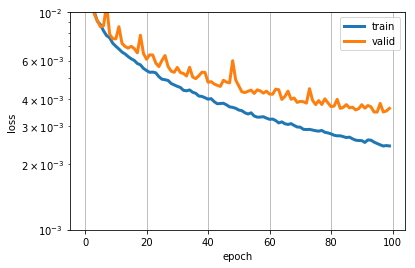

In [7]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, linewidth=3, label='train')
plt.plot(val_loss, linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(1e-3, 1e-2)
plt.yscale('log')
plt.show()




### Evaluation

In [8]:
X_test, _ = load(test=True)
y_pred = model.predict(X_test)

ImageId    1783
Image      1783
dtype: int64


In [9]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

In [10]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, aticks=[], yticks=[])
    plot_sample(X_test[i], y_pred[i], ax)
    
plt.show()

## Method 2

In [11]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [12]:
class FlippedImageDataGenerator(ImageDataGenerator):
    flip_indices = [(0, 2), (1, 3), (4, 8), (5, 9),
                    (6, 10), (7, 11), (12, 16), (13, 17),
                    (14, 18), (15, 19), (22, 24), (23, 25)]
    
    def next(self):
        X_batch, y_batch = super(FlippedImageDataGenerator, self).next()
        batch_size = X_batch.shape[0]
        indices = np.random.choice(batch_size, batch_size / 2, replace=False)
        X_batch[indices] = X_batch[indices, :, :, ::-1]
        
        if y_batch is not None:
            y_batch[indices, ::2] = y_batch[indices,::2] * -1
            
            for a, b in self.flip_indices:
                y_batch[indices, a], y_batch[indices, b] = (
                    y_batch[indices, b], y_batch[indices, a]
                )
                
        return X_batch, y_batch

### Model

In [13]:
def cnn_model():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same',
                     activation='relu',
                     kernel_initializer='he_normal',
                     input_shape=(96, 96, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(30))
    
    return model

model2 = cnn_model()
model2.summary()


sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model2.compile(loss='mean_squared_error', optimizer=sgd)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
__________

### Training

In [ ]:
X, y = load2d()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

epochs = 30

flipgen = FlippedImageDataGenerator()
history = model2.fit_generator(flipgen.flow(X_train, y_train),
                               steps_per_epoch=len(X_train),
                               epochs=epochs,
                               validation_data=(X_val, y_val))

### Display results

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, linewidth=3, label='train')
plt.plot(val_loss, linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(1e-3, 1e-2)
plt.yscale('log')
plt.show()

### Evaluation

In [ ]:
X_test2, _ = load2d(test=True)
y_pred2 = model2.predict(X_test2)

In [ ]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

In [ ]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_pred[i], ax)
    
plt.show()

## Compare tow model's results

In [ ]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='0', s=40)
    
fig = plt.figure(figsize=(8, 8))
idx = 30
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# model 1
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
ax.set_title('model #1')
plot_sample(X_test[idx], y_pred[idx], ax)

# model 2
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax.set_title('model #2')
plot_sample(X_test2[idx], y_pred2[idx], ax)